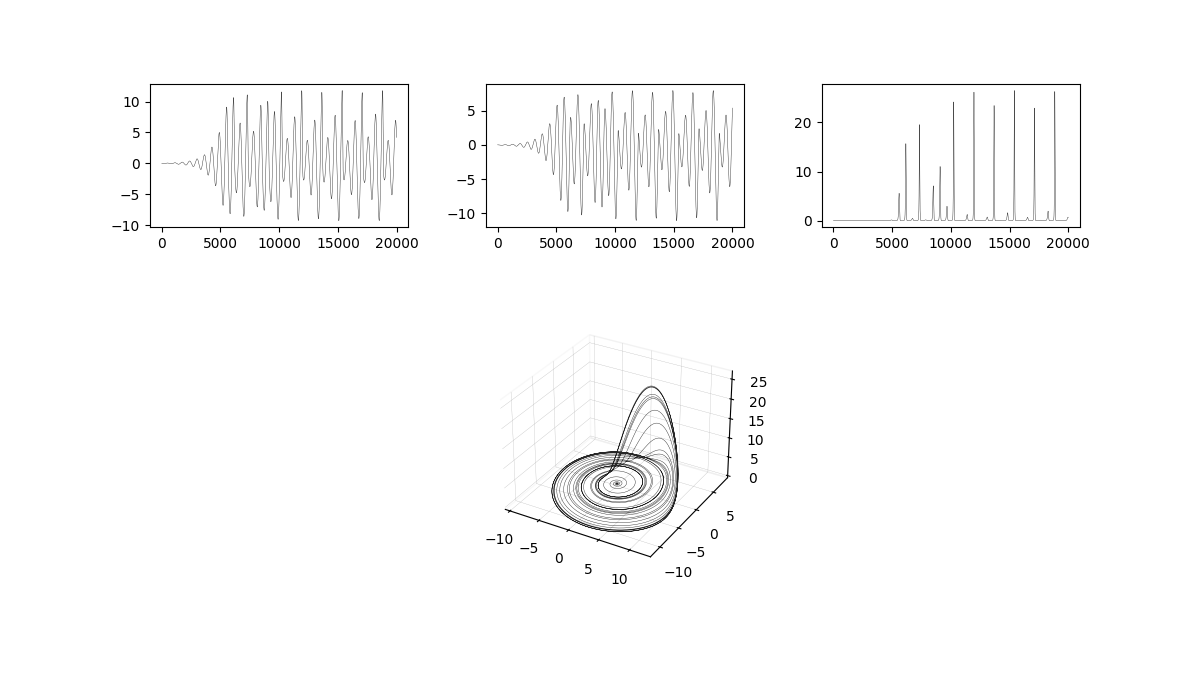

In [37]:
# Aggregat three timeseries to one 3D attraktor

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#data = np.loadtxt("OEE_over_time2.txt")
filename = "aggregat_ssop"


data = np.loadtxt("data/" + filename +".txt", skiprows=24)

x = data[:, :4]
fig = plt.figure()

# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(7)
# set width of each subplot as 8
fig.set_figwidth(12) 

spec = gridspec.GridSpec(ncols=3, nrows=2,
                         width_ratios=[1,1,1], wspace=0.3,
                         hspace=0.15, height_ratios=[1,2.5])
# fig.set_figwidth(18)
# fig.set_figheight(8)
# system = [1,2,3]

def roessler(x, y, z, a=0.2, b=0.2, c=5.7):
    dx = -(y + z)
    dy = x + a * y
    dz = b + z * (x - c)
    return dx, dy, dz

dt = 0.01
numSteps = 20000
 
# Arrays für x, y und z Werte initialisieren
X = np.zeros(numSteps + 1)
Y = np.zeros(numSteps + 1)
Z = np.zeros(numSteps + 1)
 
# Starwerte festlegen
X[0], Y[0], Z[0] = (0, 0, 0)

for i in range(numSteps):
    dx, dy, dz = roessler(X[i], Y[i], Z[i])
    X[i + 1] = X[i] + (dx * dt)
    Y[i + 1] = Y[i] + (dy * dt)
    Z[i + 1] = Z[i] + (dz * dt)

ax = fig.add_subplot(spec[4], projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis._axinfo["grid"].update({"linewidth":0.2})
ax.yaxis._axinfo["grid"].update({"linewidth":0.2})
ax.zaxis._axinfo["grid"].update({"linewidth":0.2})
ax.grid(which='major', color='#EBEBEB', linewidth=0.01)
ax.xaxis.set_visible(False)
#ax.yticks(color='w')
#ax.zticks(color='w')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
# ax.plot(x[:, 0], x[:, 1], x[:, 2], linewidth=0.3, alpha=0.85, color="black" ) #,linestyle="-.")
ax.plot(X,Y,Z, linewidth=0.3, alpha=0.85, color="black" ) #,linestyle="-.")
ax = fig.add_subplot(spec[0])
ax.plot(X, linewidth=0.3, alpha=0.85, color="black" ) #,linestyle="-.")
ax = fig.add_subplot(spec[1])
ax.plot(Y, linewidth=0.3, alpha=0.85, color="black" ) #,linestyle="-.")
ax = fig.add_subplot(spec[2])
ax.plot(Z, linewidth=0.3, alpha=0.85, color="black" ) #,linestyle="-.")

out = np.array([X,Y,Z])
out = out.transpose()
np.savetxt("roessler.txt", out, fmt='%1.1f')